In [22]:
#We need to study the diffusion of particles due to several reasons:
#1. As we mentioned particles need to be stable in x and y. We need to chek the motion of particles is indeed small
#This should indeed be the case since brownian motion is usually weak
#2.We need to investigate how the thermal diffusion will bring the particles off the isothermal surface. This deviation is expected to be small since brownian motion is weak.
#3. We need to consider the concentration of molecues. Larger molecues can only form when the smaller molecues collide with each other and merges into 
#a larger one. Thus if the diffusion rate is much larger than the characteristic length scale of the samller molecues (in units of nm), collision is much harder to happen 
#since they are further apart due to diffusion.
#Thus our goal is to prove that the particle's brownian motion will not have a significant change on the temperature it feels.

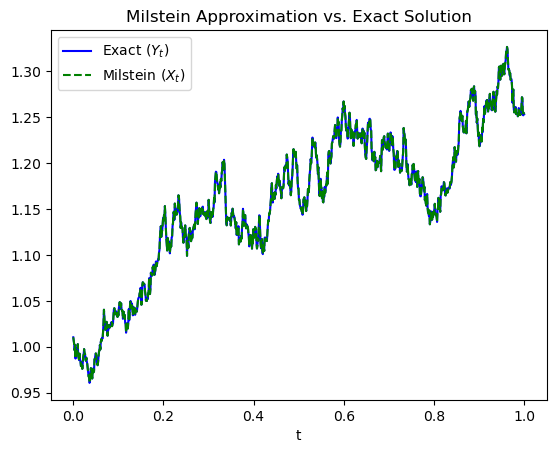

In [1]:
#Brownian motion in free space
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(1)
N = 1000
T = 1.0
dt = T / N
mu = 0.0
sigma = 0.2
X0 = 1
t = np.linspace(0, T, N)  # Corrected line

# Create Brownian Motion
dB = np.sqrt(dt) * np.random.randn(N)
B = np.cumsum(dB)

# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + sigma * B)

# Milstein Approximation
Xmil, X = [], X0
for j in range(N):  
    X += mu*X*dt + sigma*X*dB[j] + 0.5*sigma**2 * X * (dB[j] ** 2 - dt)
    Xmil.append(X)

# Plot
plt.plot(t, Y, label="Exact ($Y_t$)", color='blue')
plt.plot(t, Xmil, label="Milstein ($X_t$)", linestyle='--', color='green')
plt.title('Milstein Approximation vs. Exact Solution')
plt.xlabel('t')
plt.legend(loc=2)
plt.show()



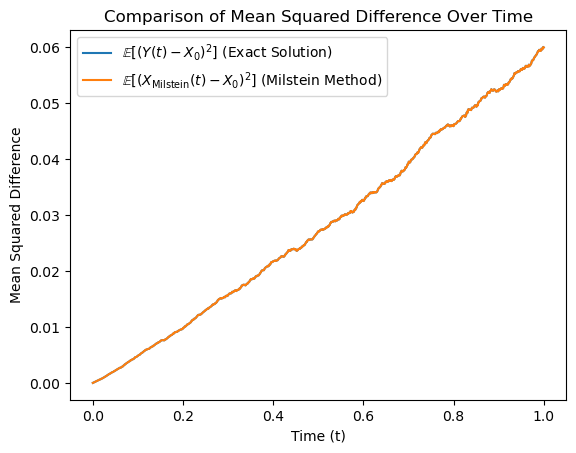

In [90]:
#calculate MSD. We see its indeed linear with respect to time.
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(1)
N = 1000
T = 1.0
dt = T / N
mu = 0.1
sigma = 0.2
X0 =1
t = np.linspace(0, T, N)

# Number of simulations
num_simulations = 1000

# Initialize arrays to store results
mean_squared_diffs = np.zeros(N)
mean_squared_diffs_milstein = np.zeros(N)

# Simulate Brownian Motion and Milstein method multiple times
for i in range(num_simulations):
    dB = np.sqrt(dt) * np.random.randn(N)
    B = np.cumsum(dB)
    
    # Exact Solution for each simulation
    Y = X0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)

    # Milstein Approximation
    Xmil, X = [], X0
    for j in range(N):  
        X += mu*X*dt + sigma*X*dB[j] + 0.5*sigma**2 * X * (dB[j] ** 2 - dt)
        Xmil.append(X)

    # Convert Xmil to a NumPy array for mathematical operations
    Xmil = np.array(Xmil)

    # Calculate squared differences at each time step and accumulate them
    mean_squared_diffs += (Y - X0)**2
    mean_squared_diffs_milstein += (Xmil - X0)**2

# Calculate the mean squared differences at each time step
mean_squared_diffs /= num_simulations
mean_squared_diffs_milstein /= num_simulations

# Plot the results
plt.plot(t, mean_squared_diffs, label=r'$\mathbb{E}[(Y(t) - X_0)^2]$ (Exact Solution)')
plt.plot(t, mean_squared_diffs_milstein, label=r'$\mathbb{E}[(X_{\mathrm{Milstein}}(t) - X_0)^2]$ (Milstein Method)')
plt.xlabel('Time (t)')
plt.ylabel('Mean Squared Difference')
plt.title('Comparison of Mean Squared Difference Over Time')
plt.legend()
plt.show()





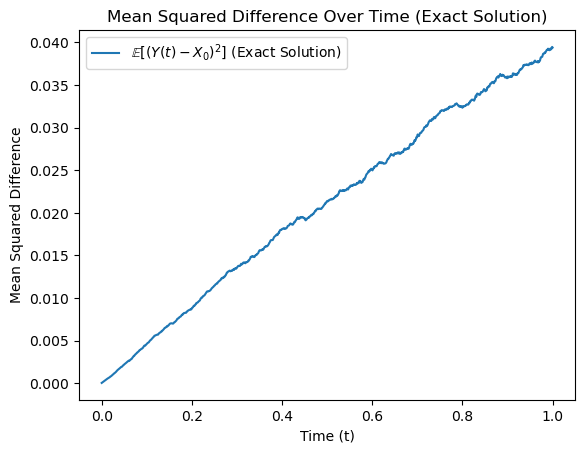

In [91]:
#MSD calculated using the exact solution
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(1)
N = 1000
T = 1.0
dt = T / N
mu =0
sigma = 0.2
X0 = 1.0
t = np.linspace(0, T, N)

# Number of simulations
num_simulations = 1000

# Initialize arrays to store results
mean_squared_diffs = np.zeros(N)

# Simulate Brownian Motion multiple times
for i in range(num_simulations):
    dB = np.sqrt(dt) * np.random.randn(N)
    B = np.cumsum(dB)
    
    # Exact Solution for each simulation
    Y = X0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)

    # Calculate squared differences at each time step and accumulate them
    mean_squared_diffs += (Y - X0)**2

# Calculate the mean squared differences at each time step
mean_squared_diffs /= num_simulations

# Plot the results
plt.plot(t, mean_squared_diffs, label=r'$\mathbb{E}[(Y(t) - X_0)^2]$ (Exact Solution)')
plt.xlabel('Time (t)')
plt.ylabel('Mean Squared Difference')
plt.title('Mean Squared Difference Over Time (Exact Solution)')
plt.legend()
plt.show()


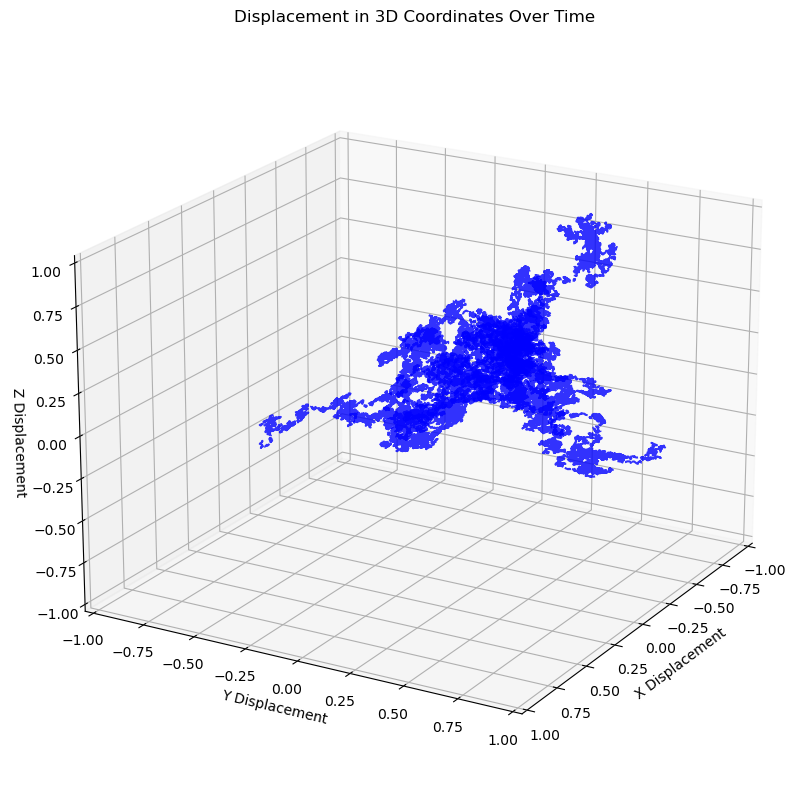

In [95]:
#The trajectory of Brownian motion
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set parameters
np.random.seed(1)
N = 10000
T = 10.0  # Total simulation time
dt = T / N
mu = 0.0
sigma = 0.1
X0 = np.array([1.0, 1.0, 1.0])  # Initial position in x, y, and z
t = np.linspace(0, T, N)

# Number of simulations
num_simulations = 10

# Initialize arrays to store results
exact_values_x = np.zeros((N, num_simulations))
exact_values_y = np.zeros((N, num_simulations))
exact_values_z = np.zeros((N, num_simulations))

# Simulate Brownian Motion
for i in range(num_simulations):
    dB_x = np.sqrt(dt) * np.random.randn(N)
    dB_y = np.sqrt(dt) * np.random.randn(N)
    dB_z = np.sqrt(dt) * np.random.randn(N)

    B_x = np.cumsum(dB_x)
    B_y = np.cumsum(dB_y)
    B_z = np.cumsum(dB_z)

    # Exact Solution for each simulation
    Y_x = X0[0] * np.exp((mu - 0.5 * sigma**2) * t + sigma * B_x)
    Y_y = X0[1] * np.exp((mu - 0.5 * sigma**2) * t + sigma * B_y)
    Y_z = X0[2] * np.exp((mu - 0.5 * sigma**2) * t + sigma * B_z)

    # Save exact values
    exact_values_x[:, i] = Y_x
    exact_values_y[:, i] = Y_y
    exact_values_z[:, i] = Y_z

# Plot the results in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot exact values for each coordinate
for i in range(num_simulations):
    ax.plot(exact_values_x[:, i], exact_values_y[:, i], exact_values_z[:, i], linestyle='--', alpha=0.8, color='blue')

ax.set_xlabel('X Displacement')
ax.set_ylabel('Y Displacement')
ax.set_zlabel('Z Displacement')
ax.set_title('Displacement in 3D Coordinates Over Time')

# Adjust axis limits for zooming in
ax.set_xlim([-1, 1])  
ax.set_ylim([-1, 1])   
ax.set_zlim([-1, 1]) 
# Adjust viewing angle for better visualization
ax.view_init(elev=20, azim=30)

plt.show()


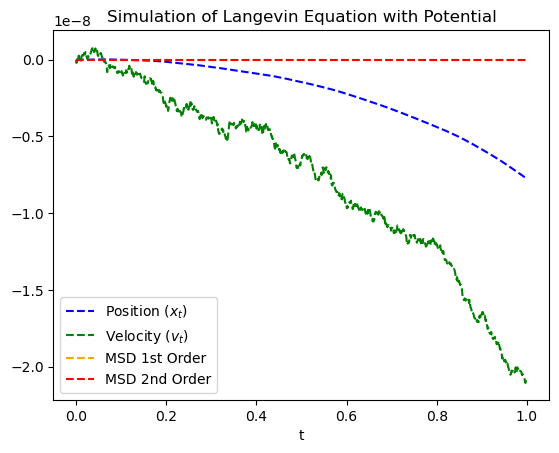

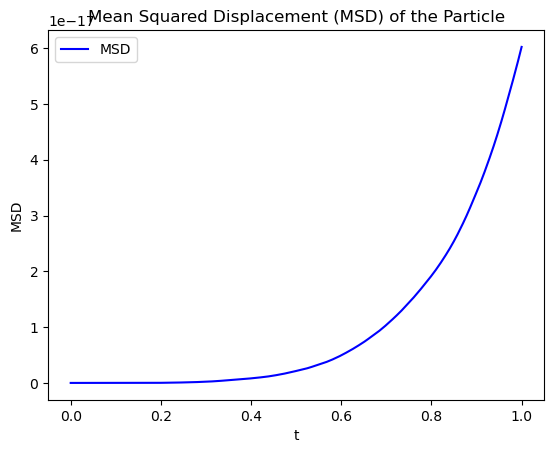

In [99]:
#Let us go back to our example(3d hydrothermal). We choss potential to be gravity.
#The position after some time needs taylor approximation, since there should be a terminal velocity (due to drag force)
#We see the red line is the result we want. It matches with our exact solution till 0.2s, so we take this as our simulation time.
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(1)
N = 1000
T = 1.0
dt = T / N
lambda_val = -6 * np.pi * 0.001 * 0.10852  # Using the provided value for lambda
k_B = 1.38e-23  # Boltzmann constant in J/K
T_0 = 303.15  # Using the provided value for temperature
X0 = 0.0
v0 = 0.0
m = 0.001

# Create time array
t = np.linspace(0, T, N)

# Initialize position and velocity
x = np.zeros(N)
v = np.zeros(N)
x[0] = X0
v[0] = v0

# Simulate Langevin equation using Euler-Maruyama method
for i in range(1, N):
    # Langevin equation
    product_term = 2 * k_B * T_0 * lambda_val * dt
    if product_term < 0:
        product_term = np.abs(product_term)
    v[i] = v[i - 1] + (-lambda_val * v[i - 1] * dt / m - np.sqrt(product_term) / m * np.random.randn())
    x[i] = x[i - 1] + v[i] * dt

# Calculate Mean Squared Displacement (MSD)
msd = np.mean((x - X0)**2)

# Calculate the first two orders of MSD expression
msd_first_order = v0**2 * t**2
msd_second_order = 2 * t * np.mean(X0 * v0) + np.mean(X0**2)

# Plotting
plt.plot(t, x, label="Position ($x_t$)", linestyle='--', color='blue')
plt.plot(t, v, label="Velocity ($v_t$)", linestyle='--', color='green')
plt.plot(t, msd_first_order, label="MSD 1st Order", linestyle='--', color='orange')
plt.plot(t, msd_second_order, label="MSD 2nd Order", linestyle='--', color='red')
plt.title('Simulation of Langevin Equation with Potential')
plt.xlabel('t')
plt.legend()

# Plot MSD
plt.figure()
plt.plot(t, (x - X0)**2, label="MSD", color='blue')
plt.title('Mean Squared Displacement (MSD) of the Particle')
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

plt.show()



Expectation Value (Mean) of Displacement: -0.0000


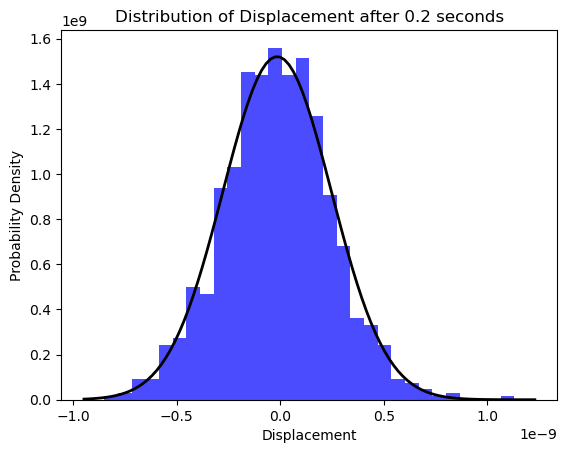

In [102]:
#The distribution of brownian motion of collidals at t=0.2s. We see the mean displacement is 0 as expected
#We see the x displacement is small (less than 1nm) for the molecules, meaning they indeed have a small difussion rate.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Set parameters
np.random.seed(1)
N = 200
num_simulations = 1000  # Number of simulations
T = 0.2
dt = T / N
lambda_val = -6 * np.pi * 0.001 * 0.10852  # Using the provided value for lambda
k_B = 1.38e-23  # Boltzmann constant in J/K
T_0 = 303.15  # Using the provided value for temperature
X0 = 0.0
v0 = 0.0
m = 0.001  # Mass of a molecule in kg

# Create time array
t = np.linspace(0, T, N)

# Initialize position and velocity
x_final_positions = np.zeros(num_simulations)

# Simulate Langevin equation using Euler-Maruyama method multiple times
for sim in range(num_simulations):
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = X0
    v[0] = v0

    for i in range(1, N):
        # Langevin equation
        product_term = 2 * k_B * T_0 * lambda_val * dt
        if product_term < 0:
            product_term = np.abs(product_term)
        v[i] = v[i - 1] + (-lambda_val * v[i - 1] * dt / m -
                           np.sqrt(product_term) / m * np.random.randn())
        x[i] = x[i - 1] + v[i] * dt

    # Collect final positions
    x_final_positions[sim] = x[-1]

# Plotting the distribution of displacement after 5 seconds
plt.hist(x_final_positions, bins=30, density=True, color='blue', alpha=0.7)

# Calculate expectation value (mean) of displacement
mean_displacement = np.mean(x_final_positions)
print(f"Expectation Value (Mean) of Displacement: {mean_displacement:.4f}")

# Fit a Gaussian distribution to the histogram
hist_mean, hist_std = norm.fit(x_final_positions)
xmin, xmax = plt.xlim()
x_fit = np.linspace(xmin, xmax, 100)
p_fit = norm.pdf(x_fit, hist_mean, hist_std)
plt.plot(x_fit, p_fit, 'k', linewidth=2)

plt.title('Distribution of Displacement after 0.2 seconds')
plt.xlabel('Displacement')
plt.ylabel('Probability Density')

plt.show()


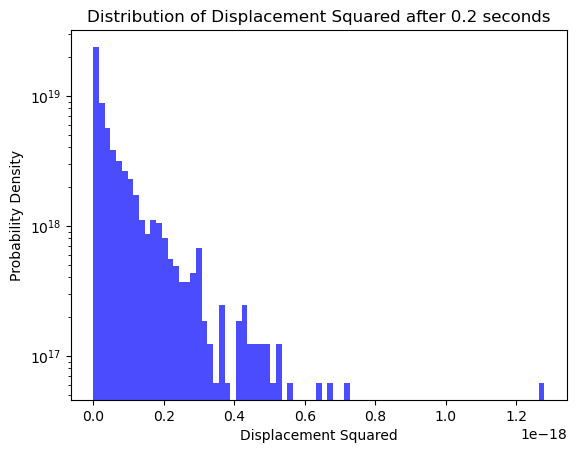

Average of Displacement Squared: 6.9064e-20
Standard Deviation of Displacement Squared: 1.0527e-19


In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(1)
N = 200
num_simulations = 1000  # Number of simulations
T = 0.2
dt = T / N
lambda_val = -6 * np.pi * 0.001 * 0.10852  # Using the provided value for lambda
k_B = 1.38e-23  # Boltzmann constant in J/K
T_0 = 303.15  # Using the provided value for temperature
X0 = 0.0
v0 = 0.0
m = 0.001  # Mass of a molecule in kg

# Create time array
t = np.linspace(0, T, N)

# Initialize displacement squared array
x_squared_final = np.zeros(num_simulations)

# Simulate Langevin equation using Euler-Maruyama method multiple times
for sim in range(num_simulations):
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = X0
    v[0] = v0

    for i in range(1, N):
        # Langevin equation
        product_term = 2 * k_B * T_0 * lambda_val * dt
        if product_term < 0:
            product_term = np.abs(product_term)
        v[i] = v[i - 1] + (-lambda_val * v[i - 1] * dt / m -
                           np.sqrt(product_term) / m * np.random.randn())
        x[i] = x[i - 1] + v[i] * dt

    # Collect final displacement squared
    x_squared_final[sim] = x[-1] ** 2

# Calculate average and standard deviation
average_squared = np.mean(x_squared_final)
std_squared = np.std(x_squared_final)

# Plotting the distribution of displacement squared after 5 seconds
plt.hist(x_squared_final, bins='auto', density=True, color='blue', alpha=0.7)

plt.title('Distribution of Displacement Squared after 0.2 seconds')
plt.xlabel('Displacement Squared')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.show()

# Display statistics
print(f"Average of Displacement Squared: {average_squared:.4e}")
print(f"Standard Deviation of Displacement Squared: {std_squared:.4e}")




Mean Distance at t=0.2: 3.4289e-10 meters
Standard Deviation of Distances at t=0.2: 1.4572e-10 meters


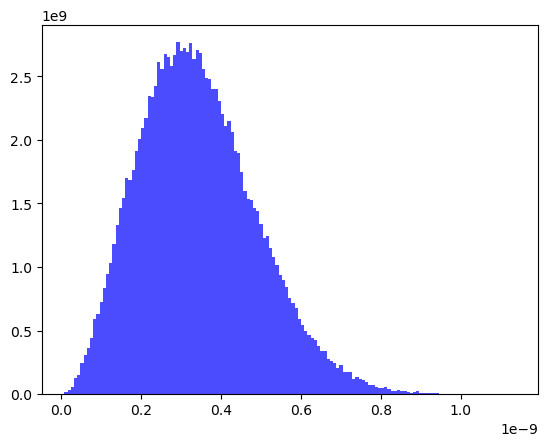

In [19]:
#This is the diffusion histogram. We see the average diffusion distance is 0.4nm, so in 1 sec the particles move for 2nm.
#This distance is not too large compare to the size of the molecules.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2, norm, poisson
from scipy.stats import chisquare

# Set parameters
np.random.seed(1)
N = 200
num_simulations = 100  # Number of simulations
T = 0.2
dt = T / N
lambda_val = 0.1
k_B = 1.38e-23  # Boltzmann constant in J/K
T_0 = 420  # Temperature in Kelvin
m_particle = 0.0001 # Mass of the particle
num_particles = 50

# Initialize array to store distances
distances_t10 = []

# Simulate Langevin equation using Euler-Maruyama method multiple times
for sim in range(num_simulations):
    x_positions = np.zeros((num_particles, 3, N))
    v = np.zeros((num_particles, 3, N))

    # Place particles in the same initial position
    x_positions[:, :, 0] = np.zeros((num_particles, 3))

    for i in range(1, N):
        # Langevin equation
        product_term = 2 * k_B * T_0 * lambda_val * dt
        if product_term < 0:
            product_term = np.abs(product_term)

        # Update velocity for all particles
        v[:, :, i] = v[:, :, i - 1] + (-lambda_val * v[:, :, i - 1] * dt / m_particle -
                                       np.sqrt(product_term) / m_particle * np.random.randn(num_particles, 3))

        # Update positions for all particles
        x_positions[:, :, i] = x_positions[:, :, i - 1] + v[:, :, i] * dt

    # Calculate distances between all pairs of particles at t=10
    for j in range(num_particles):
        for k in range(j + 1, num_particles):
            distance = np.linalg.norm(x_positions[j, :, -1] - x_positions[k, :, -1])
            distances_t10.append(distance)

# Remove NaN and infinite values
distances_t10 = np.array(distances_t10)
distances_t10 = distances_t10[np.isfinite(distances_t10)]

# Plotting the distribution of distances at t=0.2
plt.hist(distances_t10, bins='auto', density=True, color='blue', alpha=0.7)

# Display statistics
print(f"Mean Distance at t=0.2: {np.mean(distances_t10):.4e} meters")
print(f"Standard Deviation of Distances at t=0.2: {np.std(distances_t10):.4e} meters")


Mean Distance at t=0.2: 2.8980e-10 meters
Standard Deviation of Distances at t=0.2: 1.2315e-10 meters


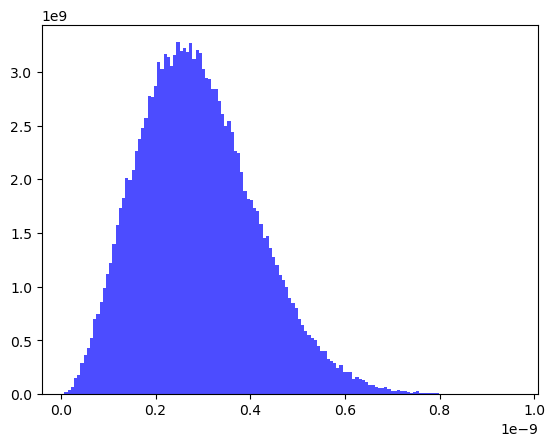

In [21]:
#We see if we decrease the temperature, the displacement in 1 sec reduced 2.5nm. This is 100 percent change.

#Fortunately, since the scales of these molecues are small enough compared to the temperature gradient, even though there is a 
#large fractional change, the overall fluctuation intemperature caused by brownian motion is weak.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2, norm, poisson
from scipy.stats import chisquare

# Set parameters
np.random.seed(1)
N = 200
num_simulations = 100  # Number of simulations
T = 0.2
dt = T / N
lambda_val = 0.1
k_B = 1.38e-23  # Boltzmann constant in J/K
T_0 = 300  # Temperature in Kelvin
m_particle = 0.0001 # Mass of the particle
num_particles = 50

# Initialize array to store distances
distances_t10 = []

# Simulate Langevin equation using Euler-Maruyama method multiple times
for sim in range(num_simulations):
    x_positions = np.zeros((num_particles, 3, N))
    v = np.zeros((num_particles, 3, N))

    # Place particles in the same initial position
    x_positions[:, :, 0] = np.zeros((num_particles, 3))

    for i in range(1, N):
        # Langevin equation
        product_term = 2 * k_B * T_0 * lambda_val * dt
        if product_term < 0:
            product_term = np.abs(product_term)

        # Update velocity for all particles
        v[:, :, i] = v[:, :, i - 1] + (-lambda_val * v[:, :, i - 1] * dt / m_particle -
                                       np.sqrt(product_term) / m_particle * np.random.randn(num_particles, 3))

        # Update positions for all particles
        x_positions[:, :, i] = x_positions[:, :, i - 1] + v[:, :, i] * dt

    # Calculate distances between all pairs of particles at t=10
    for j in range(num_particles):
        for k in range(j + 1, num_particles):
            distance = np.linalg.norm(x_positions[j, :, -1] - x_positions[k, :, -1])
            distances_t10.append(distance)

# Remove NaN and infinite values
distances_t10 = np.array(distances_t10)
distances_t10 = distances_t10[np.isfinite(distances_t10)]

# Plotting the distribution of distances at t=0.2
plt.hist(distances_t10, bins='auto', density=True, color='blue', alpha=0.7)

# Display statistics
print(f"Mean Distance at t=0.2: {np.mean(distances_t10):.4e} meters")
print(f"Standard Deviation of Distances at t=0.2: {np.std(distances_t10):.4e} meters")
